## **OBJECTIVE**

### The objective of a Mileage Prediction Regression Analysis project encompasses several goals aimed at enhancing vehicle efficiency, consumer information, and environmental sustainability. Primarily, it seeks to develop accurate models for predicting vehicle mileage based on factors like engine size, weight,displacement,horsepower,weight,accleration etc  which can aid in fuel consumption forecasting. Understanding influential factors such as environmental conditions and vehicle design is crucial for optimizing vehicle designs and promoting eco-friendly innovations. This project also aims to provide valuable guidance to consumers and fleet managers, helping them make informed decisions regarding vehicle purchases, cost-efficiency, and maintenance.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/MPG.csv')

In [8]:
df.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [9]:
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

### **DATA PREPROCESSING**

---




In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [11]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [12]:
columns = ['displacement','horsepower','weight','acceleration','mpg','model_year']
df[columns].corr()

,displacement,horsepower,weight,acceleration,mpg,model_year
displacement,1.000000,0.897257,0.932824,-0.543684,-0.804203,-0.370164
horsepower,0.897257,1.000000,0.864538,-0.689196,-0.778427,-0.416361
weight,0.932824,0.864538,1.000000,-0.417457,-0.831741,-0.306564
acceleration,-0.543684,-0.689196,-0.417457,1.000000,0.420289,0.288137
mpg,-0.804203,-0.778427,-0.831741,0.420289,1.000000,0.579267
model_year,-0.370164,-0.416361,-0.306564,0.288137,0.579267,1.000000


In [13]:
df[columns].corr().style.background_gradient(cmap='coolwarm')

,displacement,horsepower,weight,acceleration,mpg,model_year
displacement,1.000000,0.897257,0.932824,-0.543684,-0.804203,-0.370164
horsepower,0.897257,1.000000,0.864538,-0.689196,-0.778427,-0.416361
weight,0.932824,0.864538,1.000000,-0.417457,-0.831741,-0.306564
acceleration,-0.543684,-0.689196,-0.417457,1.000000,0.420289,0.288137
mpg,-0.804203,-0.778427,-0.831741,0.420289,1.000000,0.579267
model_year,-0.370164,-0.416361,-0.306564,0.288137,0.579267,1.000000


<Axes: >

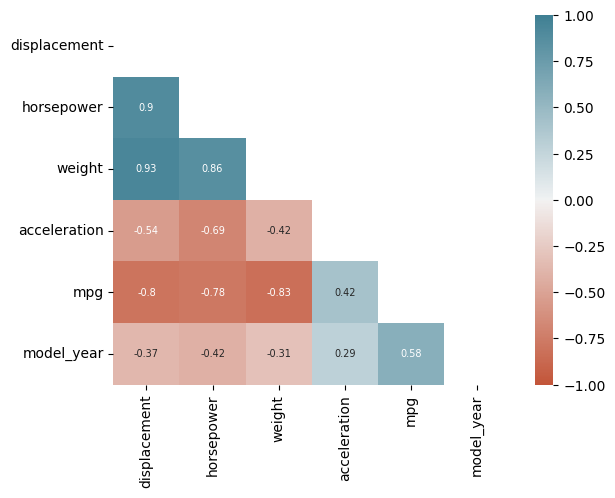

In [14]:
corrmat = df[columns].corr()
mask= np.zeros_like(corrmat)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrmat,
            vmax=1, vmin=-1,
            annot=True, annot_kws={'fontsize':7},
            mask=mask,
            cmap=sns.diverging_palette(20,220,as_cmap=True))

In [15]:
df=df.dropna()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


## **DATA VISUALIZATION**

---



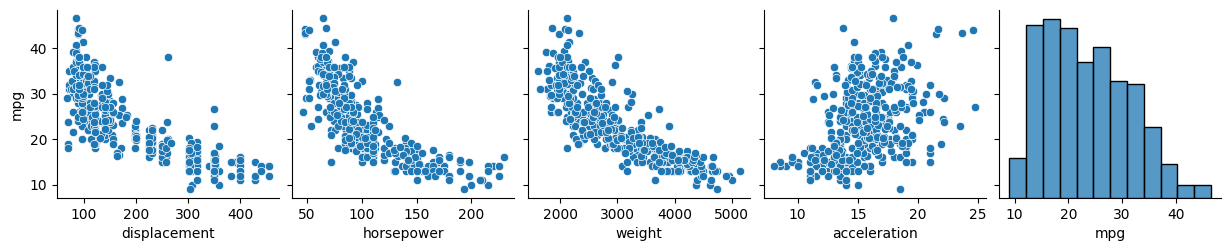

In [17]:
sns.pairplot(df, x_vars=['displacement','horsepower','weight','acceleration','mpg'],y_vars='mpg')

<Axes: xlabel='displacement', ylabel='mpg'>

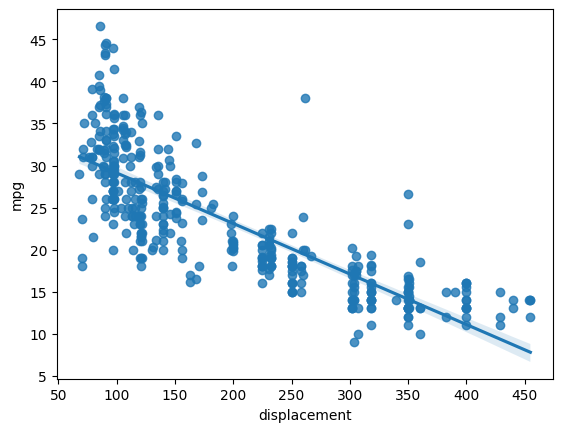

In [18]:
sns.regplot(x='displacement',
            y='mpg',
            data=df,
            )

<Axes: xlabel='horsepower', ylabel='mpg'>

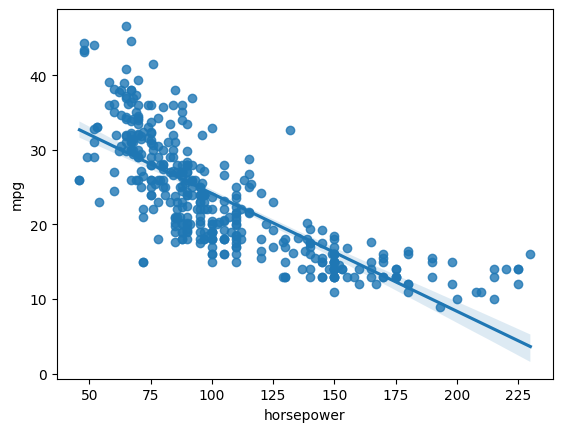

In [19]:
sns.regplot(x='horsepower',
            y='mpg',
            data=df,
            )

<Axes: xlabel='weight', ylabel='mpg'>

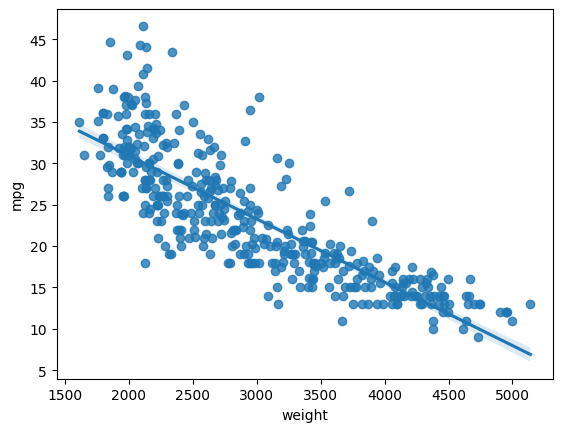

In [20]:
sns.regplot(x='weight',
            y='mpg',
            data=df,
            )

<Axes: xlabel='acceleration', ylabel='mpg'>

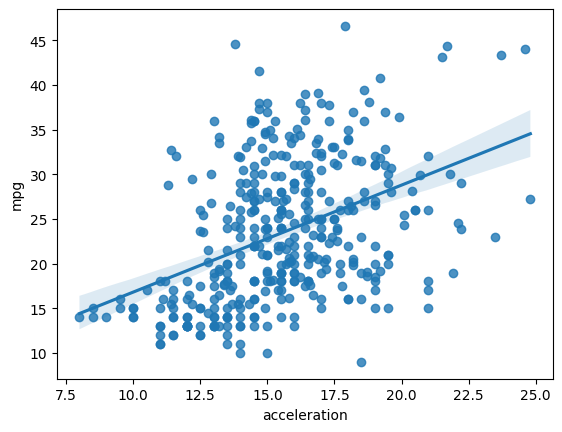

In [21]:
sns.regplot(x='acceleration',
            y='mpg',
            data=df,
            )

## **DEFINING TARGET VARIABLE "Y" AND FEATURE "X"**

---


In [22]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [23]:
Y=df['mpg']

In [24]:
Y.shape

(392,)

In [25]:
X=df[['displacement','horsepower','weight','acceleration']]
X

,displacement,horsepower,weight,acceleration
0,307.0,130.0,3504,12.0
1,350.0,165.0,3693,11.5
2,318.0,150.0,3436,11.0
3,304.0,150.0,3433,12.0
4,302.0,140.0,3449,10.5
...,...,...,...,...
393,140.0,86.0,2790,15.6
394,97.0,52.0,2130,24.6
395,135.0,84.0,2295,11.6
396,120.0,79.0,2625,18.6


In [26]:
X.shape

(392, 4)

# **SCALING THE DATA**

---



In [27]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [30]:
X= ss.fit_transform(X)
X

array([[ 1.07728956,  0.66413273,  0.62054034, -1.285258  ],
       [ 1.48873169,  1.57459447,  0.84333403, -1.46672362],
       [ 1.1825422 ,  1.18439658,  0.54038176, -1.64818924],
       ...,
       [-0.56847897, -0.53247413, -0.80463202, -1.4304305 ],
       [-0.7120053 , -0.66254009, -0.41562716,  1.11008813],
       [-0.72157372, -0.58450051, -0.30364091,  1.40043312]])

In [37]:
pd.DataFrame(X).describe()

,0,1,2,3
count,392.000000,3.920000e+02,3.920000e+02,3.920000e+02
mean,0.000000,1.812609e-17,-1.812609e-17,-1.812609e-17
std,1.001278,1.001278e+00,1.001278e+00,1.001278e+00
min,-1.209563,-1.520975e+00,-1.608575e+00,-2.736983e+00
25%,-0.855532,-7.665929e-01,-8.868535e-01,-6.410551e-01
50%,-0.415384,-2.853488e-01,-2.052109e-01,-1.499869e-02
75%,0.778276,5.600800e-01,7.510927e-01,5.384714e-01
max,2.493416,3.265452e+00,2.549061e+00,3.360262e+00


# **TRAIN TEST SPLIT DATA**

---



In [85]:
from sklearn.model_selection import train_test_split

In [40]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,train_size=0.7,random_state=2529)

In [41]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((274, 4), (118, 4), (274,), (118,))

# **USING LINEAR REGRESSION MODEL**

---


In [42]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [43]:
lr.fit(X_train,Y_train)

LinearRegression()

In [44]:
lr.intercept_

23.485738559737584

In [45]:
lr.coef_

array([-1.05767743, -1.68734727, -4.10787617, -0.11495177])

**HENCE, MILEAGE = 23.4 - 1.05DISPLACEMENT - 1.68HORSEPOWER - 4.1WEIGHT - 0.1ACCELERTION + ERROR**

---



# ***PREDICTING TEST DATA***

---

In [47]:
y_pred=lr.predict(X_test)
y_pred

array([18.51865637, 15.09305675, 14.30128789, 23.6753321 , 29.7546115 ,
       23.68796629, 26.61066644, 24.56692437, 15.06260986, 11.94312046,
       24.08050053, 27.96518468, 31.66130278, 31.01309132, 18.32428976,
       19.32795009, 28.08847536, 32.1506879 , 31.15859692, 27.15792144,
       18.82433097, 22.54580176, 26.15598115, 32.36393869, 20.74377679,
        8.78027518, 22.19699435, 18.20614294, 25.00052718, 15.26421552,
       23.13441082, 17.10542257,  9.87180062, 30.00790415, 20.41204655,
       29.11860245, 24.4305187 , 21.72601835, 10.51174626, 13.12426391,
       21.41938406, 19.96113872,  6.19146626, 17.79025345, 22.5493033 ,
       29.34765021, 13.4861847 , 25.88852083, 29.40406946, 22.41841964,
       22.07684766, 16.46575802, 24.06290693, 30.12890046, 10.11318121,
        9.85011438, 28.07543852, 23.41426617, 20.08501128, 30.68234133,
       20.92026393, 26.78370281, 22.9078744 , 14.15936872, 24.6439883 ,
       26.95515832, 15.25709393, 24.11272087, 30.80980589, 14.97

***FINDING ACCURACY OF THE MODEL***

---


In [84]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,mean_absolute_percentage_error

In [83]:
mean_absolute_error(Y_test,y_pred)

3.3286968643244106

In [52]:
mean_absolute_percentage_error(Y_test,y_pred)

0.14713035779536746

In [53]:
r2_score(Y_test,y_pred)

0.7031250746717691

# ***POLYNOMIAL REGRESSION***

---



In [82]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2,interaction_only=True,include_bias=False)

In [55]:
X_train2=poly.fit_transform(X_train)
X_test2=poly.fit_transform(X_test)

In [56]:
lr.fit(X_train2,Y_train)

LinearRegression()

In [58]:
lr.intercept_

21.273364500637662

In [59]:
lr.coef_

array([-2.76070596, -5.00559628, -1.36884133, -0.81225214,  1.24596571,
       -0.12475017, -0.90542822,  1.35064048, -0.17337823,  1.41680398])

In [61]:
y_pred_poly=lr.predict(X_test2)
y_pred_poly

array([15.44878868, 14.01519536, 13.80583049, 25.95331799, 30.89924906,
       22.68488043, 24.74986967, 22.70743639, 14.37437345, 13.20490013,
       27.50040536, 28.43976461, 34.62817954, 33.26541987, 18.4667298 ,
       17.7545968 , 27.48524651, 34.5949536 , 33.48125052, 26.8014229 ,
       16.8057769 , 21.05722575, 24.33817201, 34.77761918, 18.98156855,
       15.20071246, 19.36768258, 16.0502785 , 25.74107867, 15.66552393,
       21.08509734, 15.16602732, 14.01691976, 31.56705822, 19.0231858 ,
       30.25473337, 22.19778766, 20.91437064, 12.9555207 , 13.42118647,
       19.66061238, 17.40641384, 14.90285207, 15.96735977, 21.10552747,
       30.75019604, 13.161465  , 25.17529995, 27.9098963 , 19.87456409,
       20.90558547, 14.09427836, 23.12005126, 31.84964053, 12.83943937,
       13.95266816, 27.68977441, 20.86050123, 17.53324298, 32.71815198,
       19.6516835 , 25.44223418, 21.64139279, 13.69496796, 21.76730595,
       25.45896136, 14.12565313, 22.87127819, 31.89812676, 14.07

# ***FINDING ACCURACY OF THE MODEL***

---



In [80]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,mean_absolute_percentage_error

In [63]:
mean_absolute_error(Y_test,y_pred_poly)

2.788714772029597

In [64]:
mean_absolute_percentage_error(Y_test,y_pred_poly)

0.12074018342938686

In [65]:
r2_score(Y_test,y_pred_poly)

0.7461731314563802

***DETERMING WHICH MODEL IS BETTER SUITED FOR THE DATA BEING USED IN THE MODEL***

In [73]:

# Calculate the R-squared score for the linear regression model
r2_linear = r2_score(Y_test, y_pred)

# Calculate the R-squared score for the polynomial regression model
r2_poly = r2_score(Y_test, y_pred_poly)

# Compare the R-squared scores
if r2_poly > r2_linear:
  print("The polynomial regression model is a better fit for the data.")
else:
  print("The linear regression model is a better fit for the data.")

# The ideal value for R-squared is 1.0, which indicates a perfect fit.
# Therefore, the model with the higher R-squared score is the better model.


The polynomial regression model is a better fit for the data.
